This notebook is just an experiment to try and have our network detect an _unknown_ class when we have an out of distribution image. It's not part of the ML Zoomcamp course.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [2]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Xception transfer learning

In [5]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './train',
    target_size=(150, 150),
    batch_size=32
)

Found 20000 images belonging to 2 classes.


In [16]:
train_ds.class_indices

{'cats': 0, 'dogs': 1}

In [6]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './val',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 5000 images belonging to 2 classes.


In [17]:
val_ds.class_indices

{'cats': 0, 'dogs': 1}

In [19]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

input = keras.Input(shape=(150, 150, 3))
base = base_model(input, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
hidden = Dense(64, activation='relu')(vectors)
outputs = Dense(2)(hidden)
model = keras.Model(input, outputs)

In [20]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                131136    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 20,992,746
Trainable params: 131,266
Non-trainable params: 20,861,480
_________________________________________________________________


In [22]:
from tensorflow.keras.preprocessing.image import load_img
path = './val/cats'
name = 'cat.10222.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(150, 150))

X = np.array([np.array(img)])
X.shape

(1, 150, 150, 3)

In [23]:
model.predict(X)

array([[12.282753 , -0.4519174]], dtype=float32)

In [24]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
625/625 [==============================] - 343s 546ms/step - loss: 0.1051 - accuracy: 0.9653 - val_loss: 0.0833 - val_accuracy: 0.9644
Epoch 2/10
625/625 [==============================] - 354s 567ms/step - loss: 0.0690 - accuracy: 0.9747 - val_loss: 0.0884 - val_accuracy: 0.9604
Epoch 3/10
625/625 [==============================] - 360s 576ms/step - loss: 0.0623 - accuracy: 0.9761 - val_loss: 0.1031 - val_accuracy: 0.9612
Epoch 4/10
625/625 [==============================] - 364s 583ms/step - loss: 0.0578 - accuracy: 0.9791 - val_loss: 0.0934 - val_accuracy: 0.9590
Epoch 5/10
625/625 [==============================] - 367s 587ms/step - loss: 0.0496 - accuracy: 0.9812 - val_loss: 0.1030 - val_accuracy: 0.9648
Epoch 6/10
625/625 [==============================] - 431s 691ms/step - loss: 0.0511 - accuracy: 0.9813 - val_loss: 0.1025 - val_accuracy: 0.9656
Epoch 7/10
625/625 [==============================] - 400s 640ms/step - loss: 0.0419 - accuracy: 0.9847 - val_loss: 0.1213 -

In [25]:
import numpy as np
import matplotlib.pyplot as plt

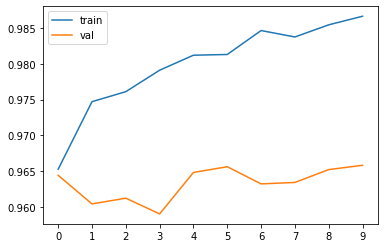

In [26]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()